In [ ]:
#import bibliotek
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import statistics as st
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
from scipy.spatial.distance import squareform, pdist, chebyshev, cityblock
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
import random
!pip install pyclustering
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer
# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics.cluster import contingency_matrix
# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 31.7 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=e9a7af48890cf08ea4ac2b696166f51a52b3cfaedecdb6387ef8f116fb2eff5e
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [ ]:
#1) Zaimportować dane (dane po wcześniejszym przeskalowaniu)
dane = pd.read_excel(r'/content/autoskalowane.xlsx', sheet_name = 'Autoskalowane')
list_of_columns = []
for column in dane.columns:
    list_of_columns.append(column)

cereals = dane['name']
dane.drop('name', inplace=True, axis=1)
dane = dane.set_axis([cereals])
X = dane

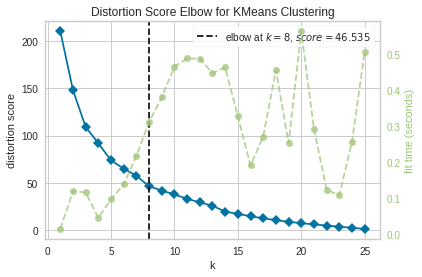

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 26))
visualizer.fit(X) 
visualizer.show() 
plt.show()

In [ ]:
def elbow_method_various_distances(distance):
  distortions = []
  inertias = []
  mapping1 = {}
  mapping2 = {}
  K = range(1, 25)
    
  for k in K:
      # Building and fitting the model
      kmeanModel = KMeans(n_clusters=k).fit(X)
      kmeanModel.fit(X)
    
      distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                          distance), axis=1)) / X.shape[0])
      inertias.append(kmeanModel.inertia_)
    
      mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                    distance), axis=1)) / X.shape[0]
      mapping2[k] = kmeanModel.inertia_

  plt.plot(K, distortions, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('SSE')
  plt.title(f'The Elbow Method using Distortion; distance: {distance}')
  plt.show()

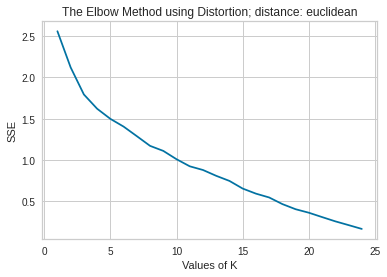

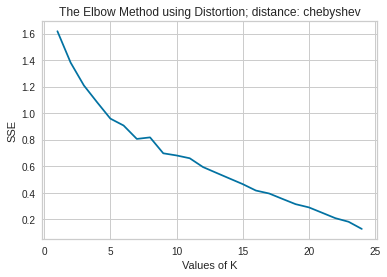

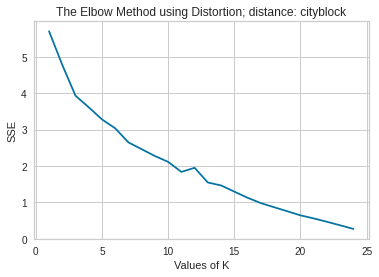

In [ ]:
elbow_method_various_distances('euclidean')
elbow_method_various_distances('chebyshev')
elbow_method_various_distances('cityblock')

In [27]:
def find_centroids(att1,att2): #losowe współrzędne centroidów
  k=8
  colors=["red","#15f3bf","#6f5bbf","pink","orange","#6f5b00","#dbdeb2","yellow"]
  clusters={}

  for j in range(k):
        wsp1 = random.choice(dane[att1])
        wsp2 = random.choice(dane[att2])
        center = [wsp1, wsp2]
        cluster={
            "center":center,
            "points":[],
            "color":colors[j]
        }
        print(center)
        clusters[j]=cluster

  return clusters

In [22]:
from scipy.spatial import distance

#odległości 

def euc_distance(p,q):
  return distance.euclidean(p, q)

def manhattan_distance(p,q):
  return distance.cityblock(p,q)

def chebyshev_distance(p,q):
  return distance.chebyshev(p,q)

In [23]:
def assignPointtoCluster(dane, clusters, att1, att2):
    k = 8
    df_new = dane[[att1, att2]]
    m=len(df_new)
    for i in range(m):
        a = df_new.iloc[i][att1]
        b = df_new.iloc[i][att2]
        current_x = [a,b]
        dist=[]
        #For every cluster center find the one nearest to the point        
        for j in range(k): #dla każdego centroidu:
            cc=clusters[j]["center"]  #centroid = ...
            d=euc_distance(current_x,cc)  #dystans = od aktualnego obiektu do centroidu
            dist.append(d)            #dystans dodać do listy
        nearest=np.argmin(dist)
        clusters[nearest]["points"].append(current_x)

In [31]:
def plotClusters(clusters):
    k = 8
    x1 = list(dane['sodium*'])
    y1=list(dane['fiber'])
    fig,ax = plt.subplots(figsize = (10,7))
    for i in range(k):
        #Get all the points assigned
        pts=np.array(clusters[i]["points"])
        ui=clusters[i]["center"]
        if pts.shape[0]>0:
            clr=clusters[i]["color"]
            plt.scatter(pts[:,0],pts[:,1],c=clr)
        plt.scatter(ui[0],ui[1],color="black",marker="*")

    plt.title('K-Means: sodium and fiber')
    plt.xlabel('sodium')
    plt.ylabel('fiber')

    n = cereals
    for i, txt in enumerate(n):
        ax.annotate(i,(x1[i],y1[i]),xytext = (x1[i]+0.05,y1[i]))

In [25]:
def updateClusterCenters(clusters):
    k = 8
    for i in range(k):
        pts=np.array(clusters[i]["points"])
        if pts.shape[0]>0:
            u=pts.mean(axis=0)
            clusters[i]["center"]=u
            clusters[i]["points"]=[]

In [26]:
#RÓŻNICE W KAŻDYM Z KLASTRÓW ANALIZY SODIUM I FIBER

def SSE(clusters):
  #odejmujemy element z clustra od centroidu i sumujemy
  for cluster in range(len(clusters)):
    list_of_lists = []
    center = clusters[cluster]['center']
    for element in clusters[cluster]['points']:
      difference_array = np.subtract(center,element)
      squared_array = np.square(difference_array)
      list_of_lists.append(squared_array)
    print([sum(x) for x in zip(*list_of_lists)])

cl = {0: {'center': ([0.58503588, 2.04411477]), 'points': [[0.3370997386413245, 2.044114774794925], [0.8329720230431218, 2.044114774794925]], 'color': 'red'}, 1: {'center': ([-0.46675576,  0.57967434]), 'points': [[-0.5652549921183171, 0.2135642302024549], [-0.5652549921183171, 0.2135642302024549], [-0.4424072248135824, 0.8237477450666115], [-0.5652549921183171, 0.8237477450666115], [-0.1956065949864704, 0.8237477450666115]], 'color': 'green'}, 2: {'center': [ 0.16538074, -0.70171104], 'points': [[0.4882571752243833, -1.006802799525858], [0.3370997386413245, -1.006802799525858], [-0.06938270771652018, -1.006802799525858], [-0.06938270771652018, -1.006802799525858], [0.4882571752243833, -0.3966192846617018], [0.06040842581448957, -0.3966192846617018], [0.1952823991147697, -0.3966192846617018], [0.4882571752243833, -0.3966192846617018], [-0.06938270771652018, -1.006802799525858], [-0.1956065949864704, -0.3966192846617018]], 'color': 'blue'}, 3: {'center': [ 1.91618652, -0.6254381 ], 'points': [[1.985503503595097, -1.006802799525858], [2.655476849020411, -0.3966192846617018], [1.985503503595097, -1.006802799525858], [1.038262228803816, -0.09152752722962344]], 'color': 'pink'}, 4: {'center': [-2.03822573, -1.0068028 ], 'points': [[-2.038225725846213, -1.006802799525858]], 'color': 'orange'}, 5: {'center': [-0.99349182, -0.54916516], 'points': [[-1.221914188268489, -0.3966192846617018], [-1.373071624851548, -0.3966192846617018], [-0.7519588756765072, -0.3966192846617018], [-0.6270225906574217, -1.006802799525858]], 'color': 'brown'}, 6: {'center': [-1.45312137,  0.82374775], 'points': [[-1.453121365838997, 0.8237477450666115]], 'color': '#dbdeb2'}, 7: {'center': [-0.22984402,  1.63732576], 'points': [[0.1952823991147697, 1.433931259930768], [-0.5652549921183171, 1.433931259930768], [-0.3195594575088479, 2.044114774794925]], 'color': 'yellow'}}
SSE(cl) 

[0.12294466121892848, 4.5982609623476624e-17]
[0.10322101703695283, 0.4467887061743718]
[0.6498017728991489, 0.9308098045299396]
[1.3269109400848755, 0.6282966180577096]
[1.7253947206205237e-17, 2.248106920636819e-19]
[0.3888954658250432, 0.2792429413589819]
[1.7313946778534596e-17, 2.4338321850337088e-17]
[0.30128185217410525, 0.24821594787465134]


[0.8329720230431218, 1.433931259930768]
[-0.5652549921183171, 0.2135642302024549]
[-0.1956065949864704, -1.006802799525858]
[0.4882571752243833, -0.3966192846617018]
[-2.038225725846213, 0.2135642302024549]
[-0.7519588756765072, -1.006802799525858]
[-2.038225725846213, 0.8237477450666115]
[0.1952823991147697, 2.044114774794925]
{0: {'center': [0.8329720230431218, 1.433931259930768], 'points': [], 'color': 'red'}, 1: {'center': [-0.5652549921183171, 0.2135642302024549], 'points': [], 'color': 'green'}, 2: {'center': [-0.1956065949864704, -1.006802799525858], 'points': [], 'color': 'blue'}, 3: {'center': [0.4882571752243833, -0.3966192846617018], 'points': [], 'color': 'pink'}, 4: {'center': [-2.038225725846213, 0.2135642302024549], 'points': [], 'color': 'orange'}, 5: {'center': [-0.7519588756765072, -1.006802799525858], 'points': [], 'color': 'brown'}, 6: {'center': [-2.038225725846213, 0.8237477450666115], 'points': [], 'color': '#dbdeb2'}, 7: {'center': [0.1952823991147697, 2.0441147

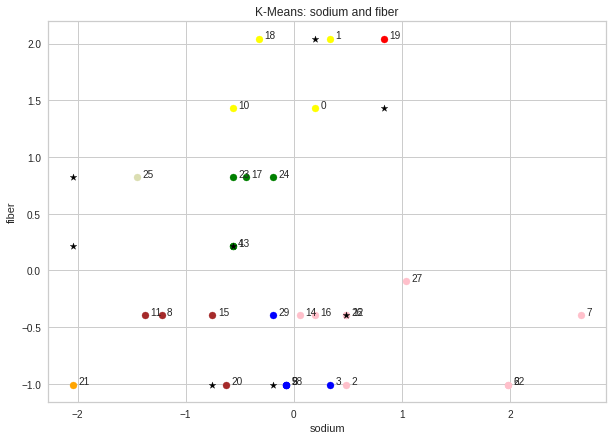

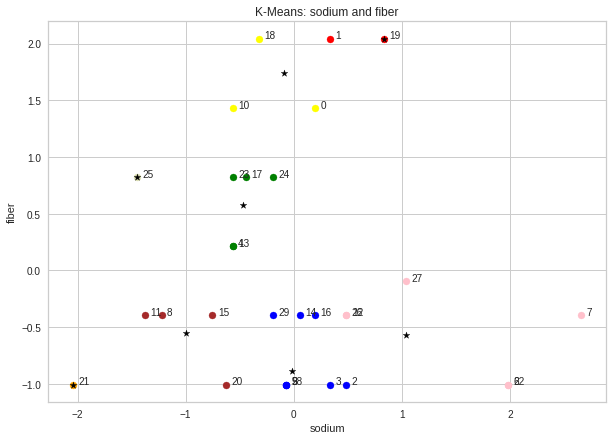

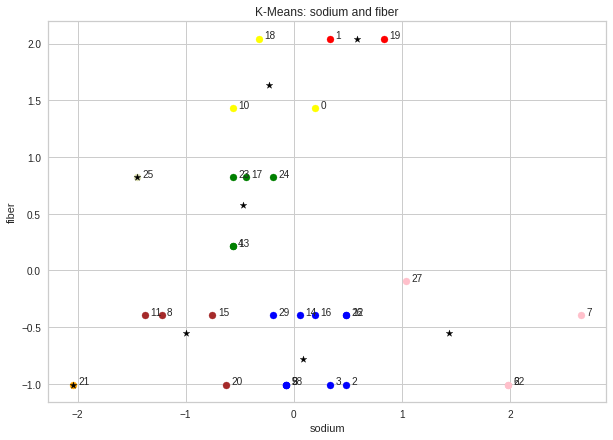

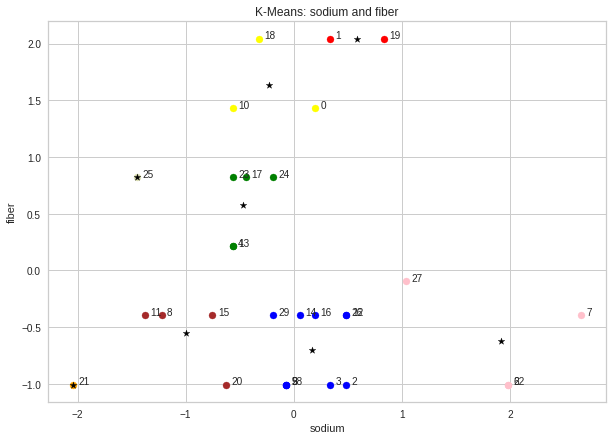

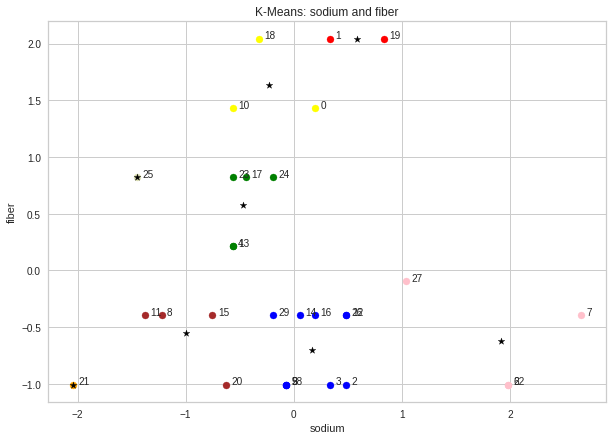

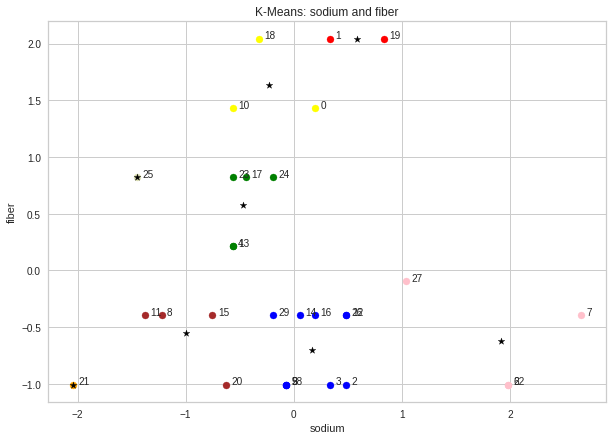

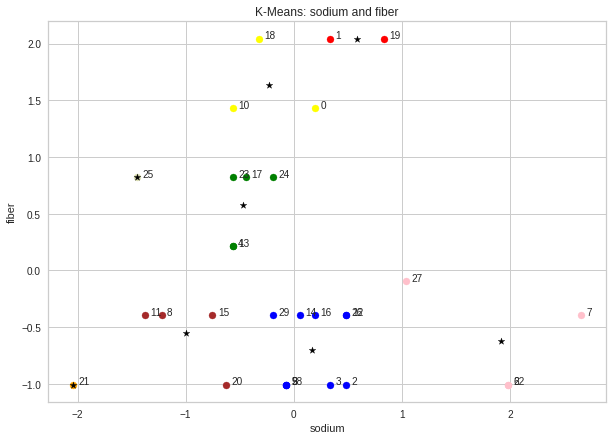

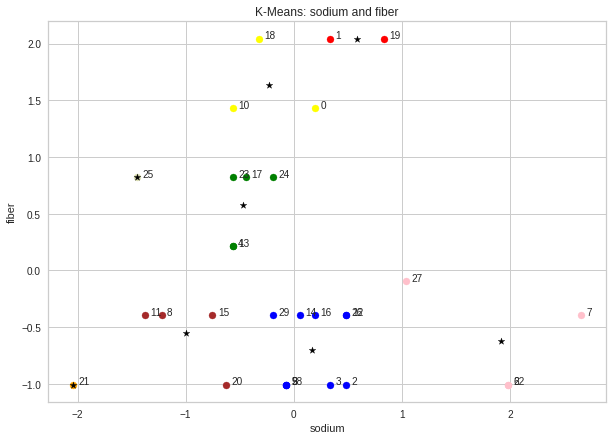

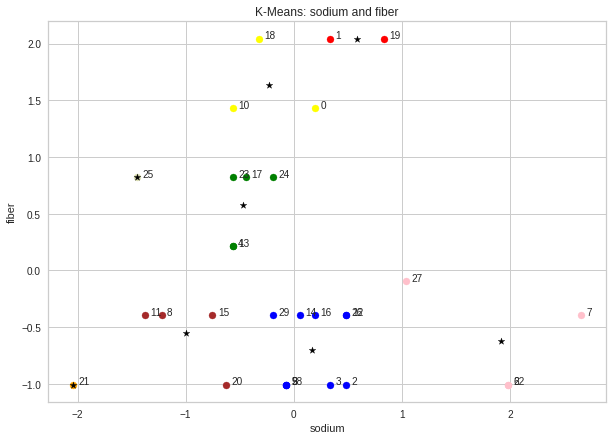

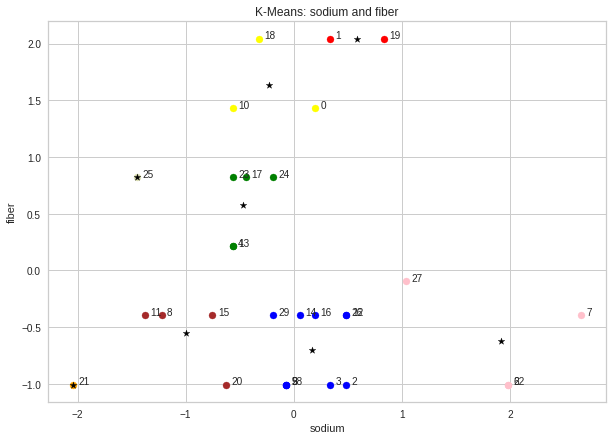

In [ ]:
clusters = find_centroids('sodium*','fiber')
print(clusters)
for iteration in range(10):
  assignPointtoCluster(X, clusters, 'sodium*', 'fiber')
  print(clusters)
  plotClusters(clusters)
  updateClusterCenters(clusters)

In [ ]:
#### UŻYCIE ODLEGŁOŚCI CZEBYSZEWA + inne zmienne ###

In [ ]:
def assignPointtoCluster(dane, clusters, att1, att2):
    k = 8
    df_new = dane[[att1, att2]]
    m=len(df_new)
    for i in range(m):
        a = df_new.iloc[i][att1]
        b = df_new.iloc[i][att2]
        current_x = [a,b]
        dist=[]
        #For every cluster center find the one nearest to the point        
        for j in range(k): #dla każdego centroidu:
            cc=clusters[j]["center"]  #centroid = ...
            d=chebyshev_distance(current_x,cc)  #dystans = od aktualnego obiektu do centroidu
            dist.append(d)            #dystans dodać do listy
        nearest=np.argmin(dist)
        clusters[nearest]["points"].append(current_x)

In [ ]:
def plotClusters(clusters):
    k = 8
    x1 = list(dane['protein'])
    y1=list(dane['carbo*'])
    fig,ax = plt.subplots(figsize = (10,7))
    for i in range(k):
        #Get all the points assigned
        pts=np.array(clusters[i]["points"])
        ui=clusters[i]["center"]
        if pts.shape[0]>0:
            clr=clusters[i]["color"]
            plt.scatter(pts[:,0],pts[:,1],c=clr)
        plt.scatter(ui[0],ui[1],color="black",marker="*")

    plt.title('K-Means: protein and carbo')
    plt.xlabel('protein')
    plt.ylabel('carbo')

    n = cereals
    for i, txt in enumerate(n):
        ax.annotate(i,(x1[i],y1[i]),xytext = (x1[i]+0.05,y1[i]))

[-1.236050945384795, 0.7397710774649144]
[1.156305723101905, -0.434906942888337]
[-1.236050945384795, -0.434906942888337]
[-1.236050945384795, -0.434906942888337]
[1.156305723101905, -0.434906942888337]
[1.156305723101905, -0.434906942888337]
[1.156305723101905, -0.434906942888337]
[1.156305723101905, 1.914449097818173]
{0: {'center': [-1.236050945384795, 0.7397710774649144], 'points': [], 'color': 'red'}, 1: {'center': [1.156305723101905, -0.434906942888337], 'points': [], 'color': '#15f3bf'}, 2: {'center': [-1.236050945384795, -0.434906942888337], 'points': [], 'color': '#6f5bbf'}, 3: {'center': [-1.236050945384795, -0.434906942888337], 'points': [], 'color': 'pink'}, 4: {'center': [1.156305723101905, -0.434906942888337], 'points': [], 'color': 'orange'}, 5: {'center': [1.156305723101905, -0.434906942888337], 'points': [], 'color': '#6f5b00'}, 6: {'center': [1.156305723101905, -0.434906942888337], 'points': [], 'color': '#dbdeb2'}, 7: {'center': [1.156305723101905, 1.914449097818173]

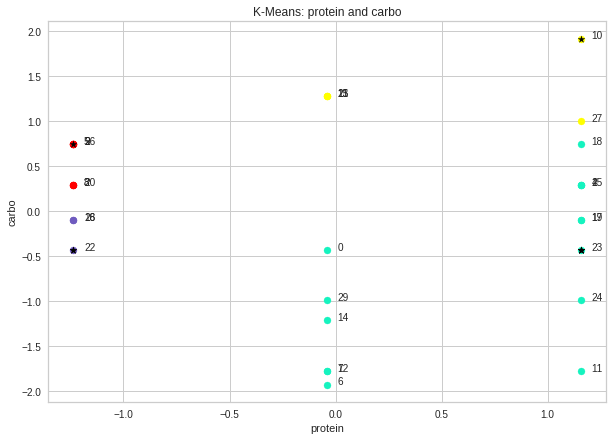

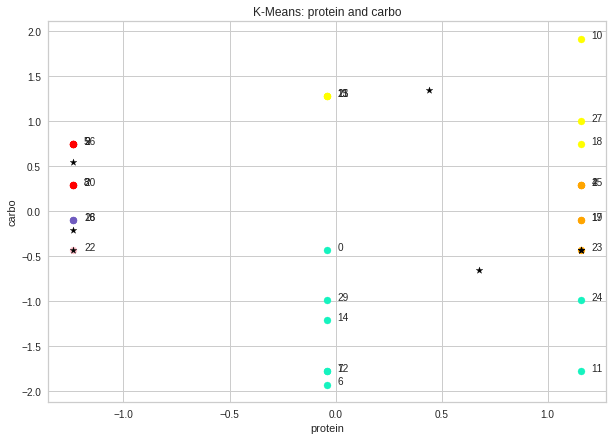

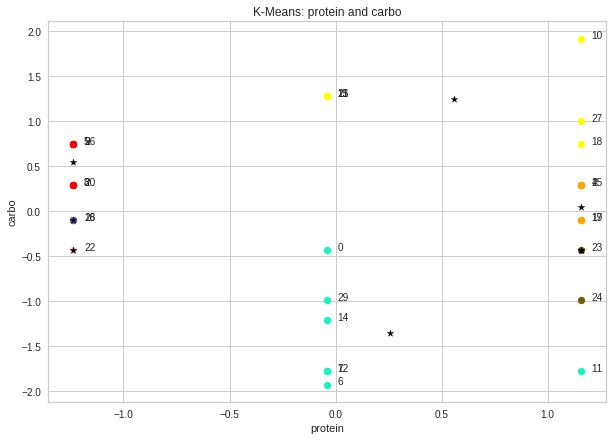

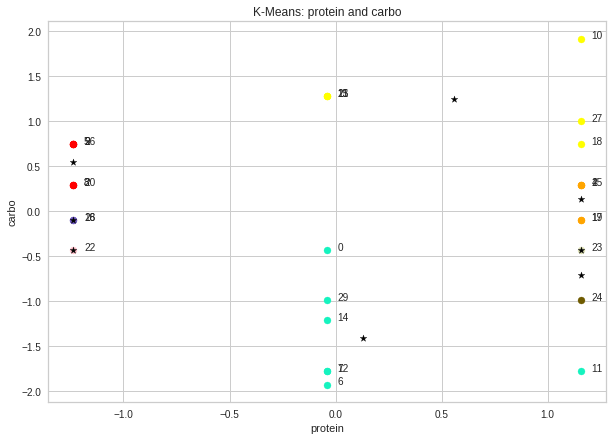

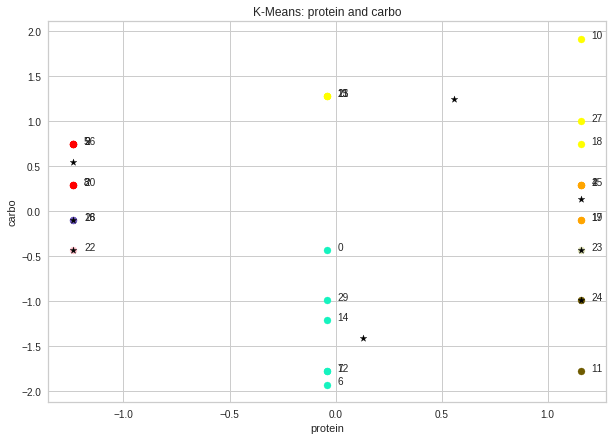

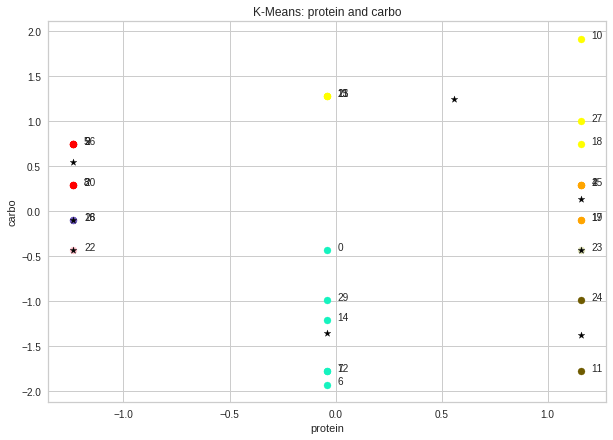

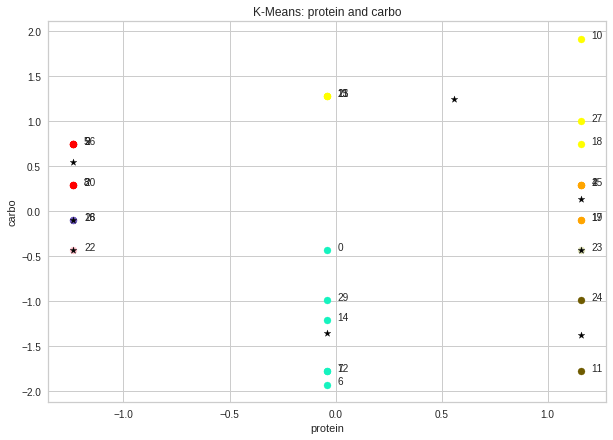

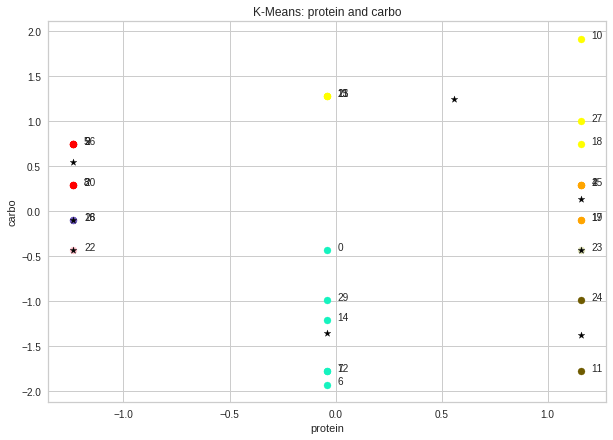

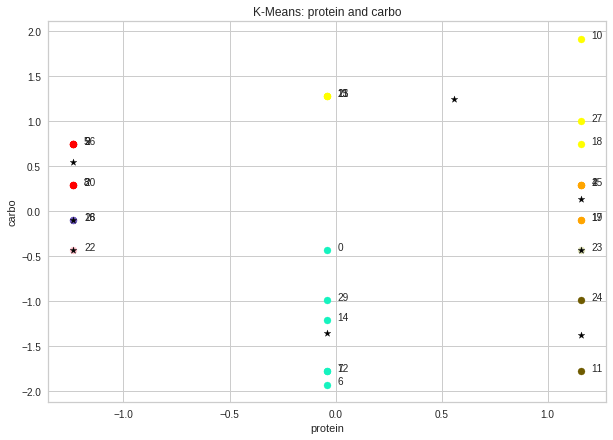

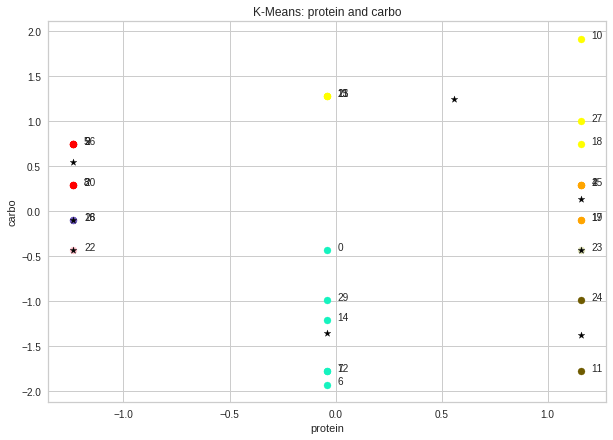

In [ ]:
clusters = find_centroids('protein','carbo*')
print(clusters)
for iteration in range(10):
  assignPointtoCluster(X, clusters, 'protein', 'carbo*')
  print(clusters)
  plotClusters(clusters)
  updateClusterCenters(clusters)

[0.8329720230431218, 1.433931259930768]
[0.4882571752243833, -0.3966192846617018]
[-0.7519588756765072, -0.3966192846617018]
[-1.453121365838997, 0.2135642302024549]
[-0.1956065949864704, 0.2135642302024549]
[-1.221914188268489, 2.044114774794925]
[1.038262228803816, -0.3966192846617018]
[1.038262228803816, -0.3966192846617018]
{0: {'center': [0.8329720230431218, 1.433931259930768], 'points': [], 'color': 'red'}, 1: {'center': [0.4882571752243833, -0.3966192846617018], 'points': [], 'color': '#15f3bf'}, 2: {'center': [-0.7519588756765072, -0.3966192846617018], 'points': [], 'color': '#6f5bbf'}, 3: {'center': [-1.453121365838997, 0.2135642302024549], 'points': [], 'color': 'pink'}, 4: {'center': [-0.1956065949864704, 0.2135642302024549], 'points': [], 'color': 'orange'}, 5: {'center': [-1.221914188268489, 2.044114774794925], 'points': [], 'color': '#6f5b00'}, 6: {'center': [1.038262228803816, -0.3966192846617018], 'points': [], 'color': '#dbdeb2'}, 7: {'center': [1.038262228803816, -0.3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


{0: {'center': array([0.45511805, 1.84072027]), 'points': [[0.1952823991147697, 1.433931259930768], [0.3370997386413245, 2.044114774794925], [0.8329720230431218, 2.044114774794925]], 'color': 'red'}, 1: {'center': array([ 0.16538074, -0.70171104]), 'points': [[0.4882571752243833, -1.006802799525858], [0.3370997386413245, -1.006802799525858], [-0.06938270771652018, -1.006802799525858], [-0.06938270771652018, -1.006802799525858], [0.4882571752243833, -0.3966192846617018], [0.06040842581448957, -0.3966192846617018], [0.1952823991147697, -0.3966192846617018], [0.4882571752243833, -0.3966192846617018], [-0.06938270771652018, -1.006802799525858], [-0.1956065949864704, -0.3966192846617018]], 'color': '#15f3bf'}, 2: {'center': array([-0.68949073, -0.70171104]), 'points': [[-0.7519588756765072, -0.3966192846617018], [-0.6270225906574217, -1.006802799525858]], 'color': '#6f5bbf'}, 3: {'center': array([-1.54440385, -0.60001379]), 'points': [[-1.221914188268489, -0.3966192846617018], [-1.373071624

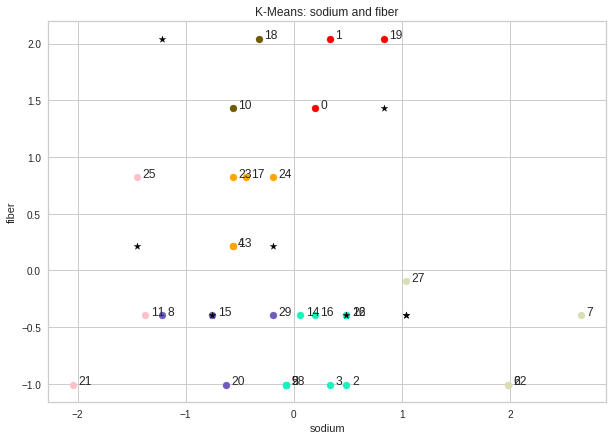

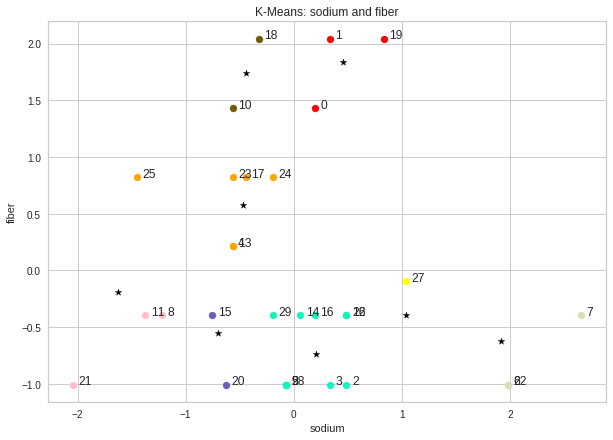

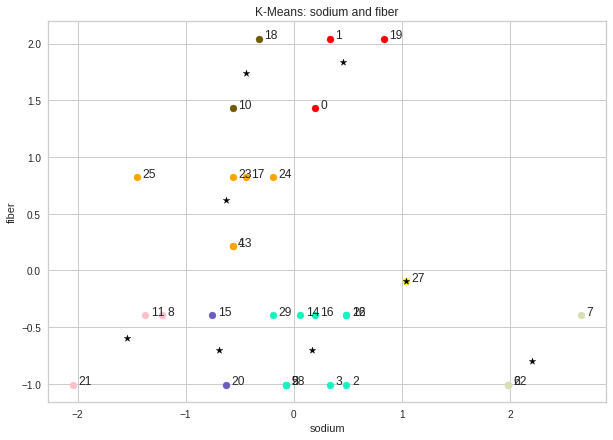

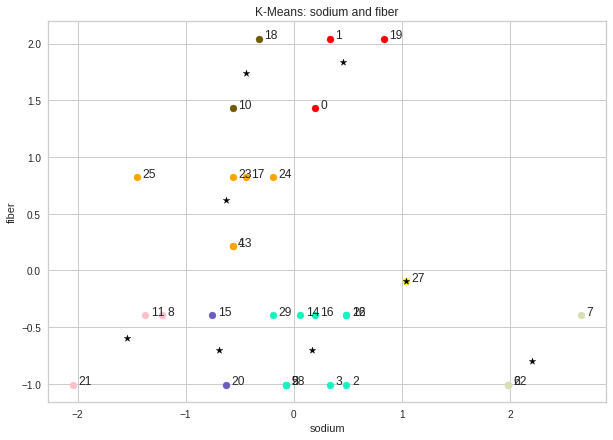

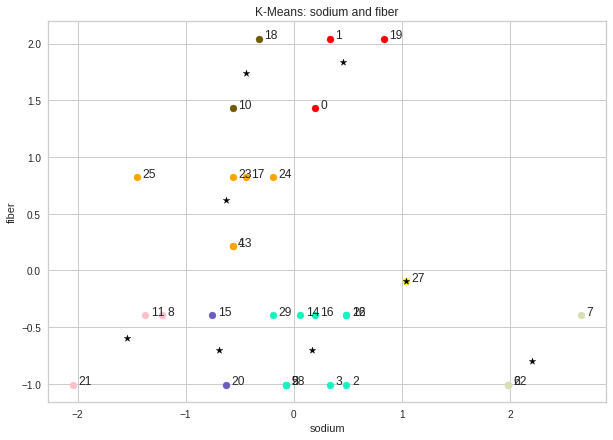

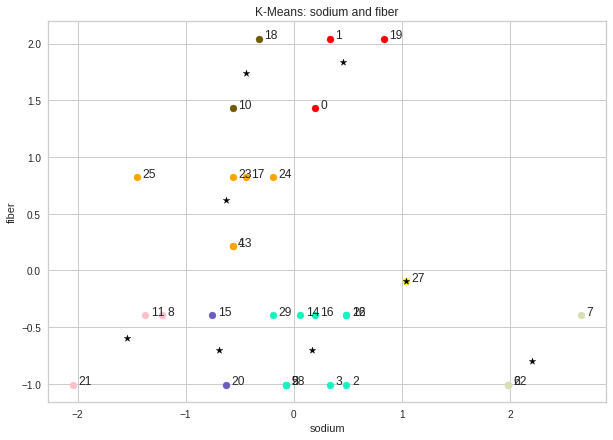

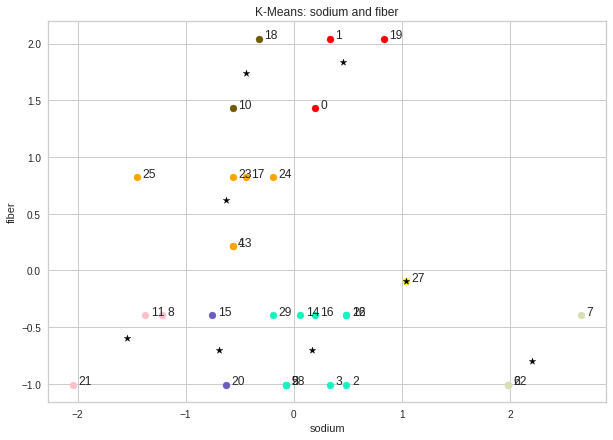

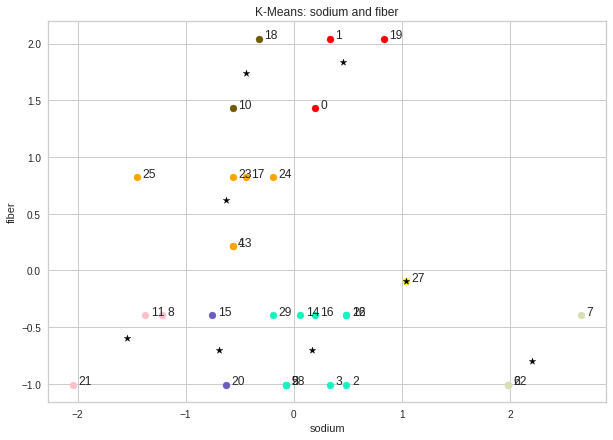

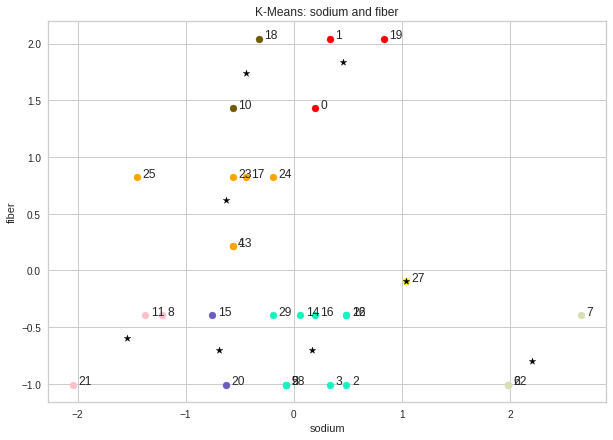

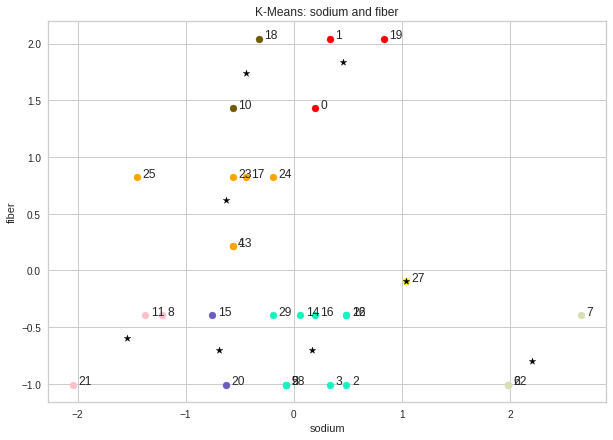

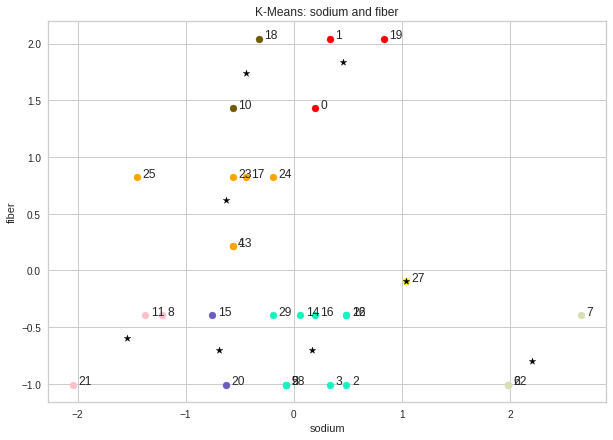

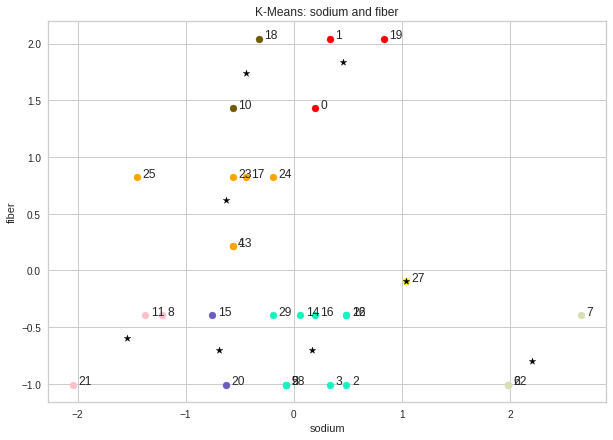

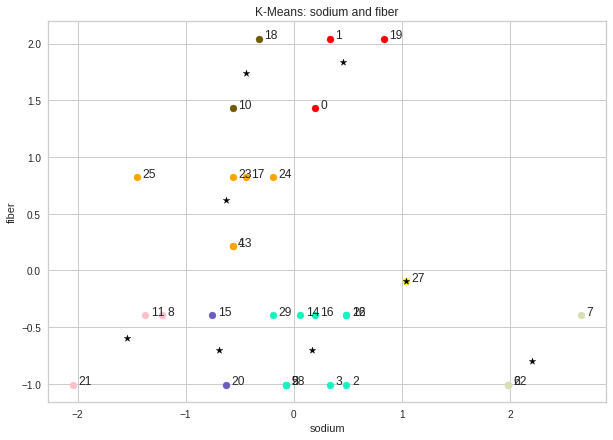

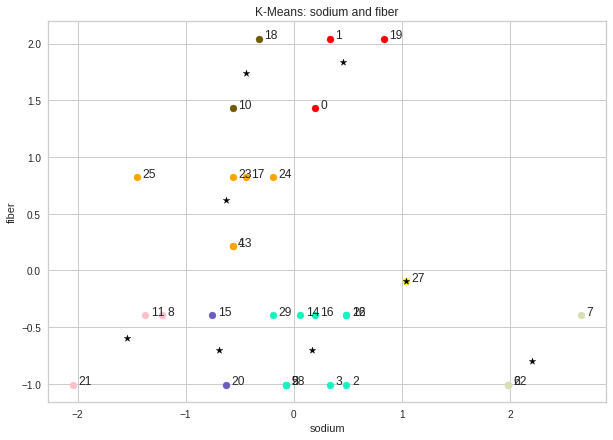

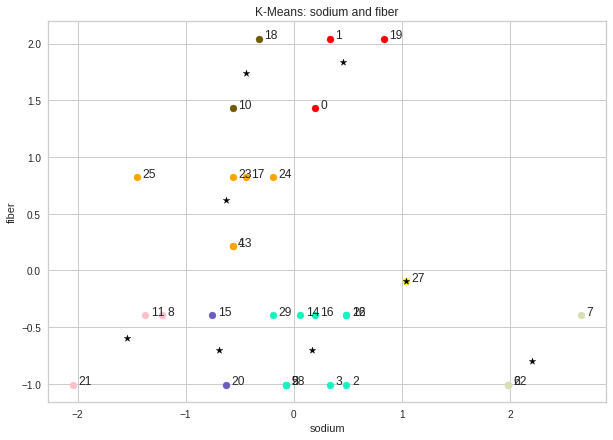

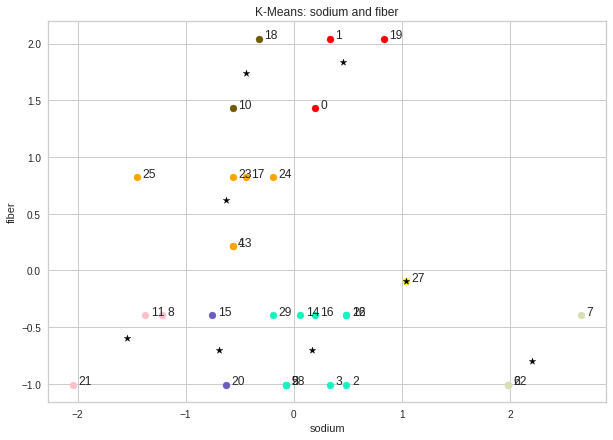

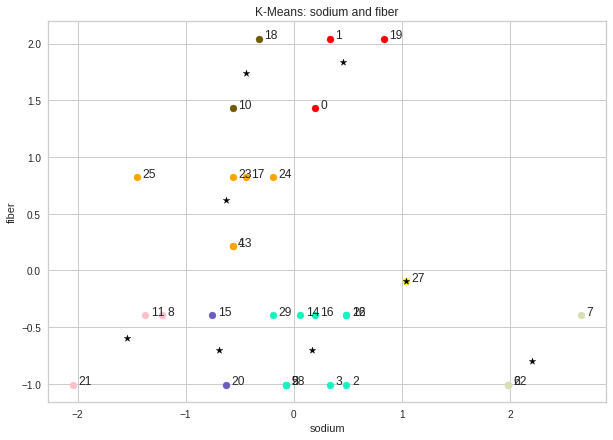

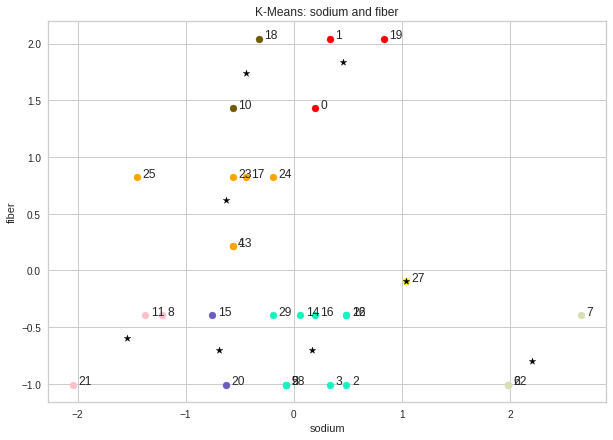

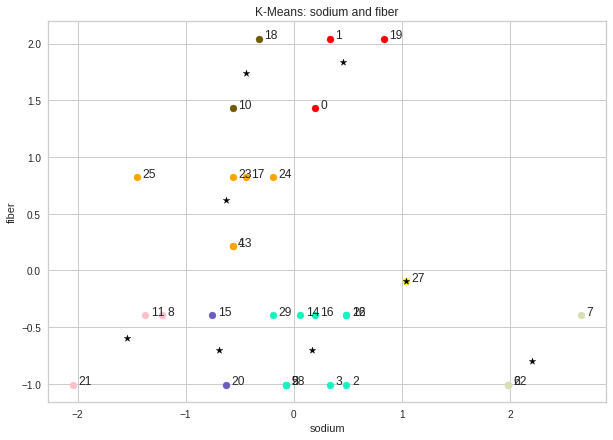

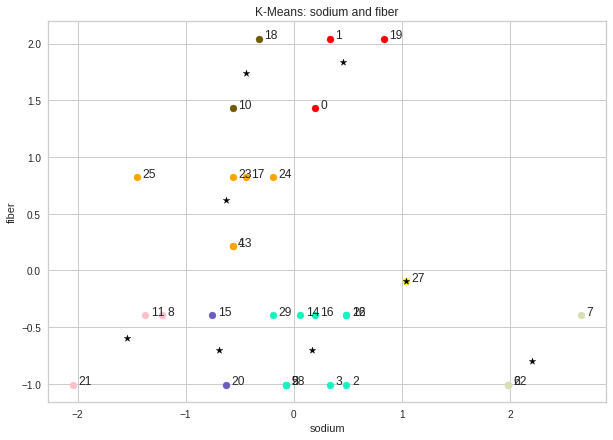

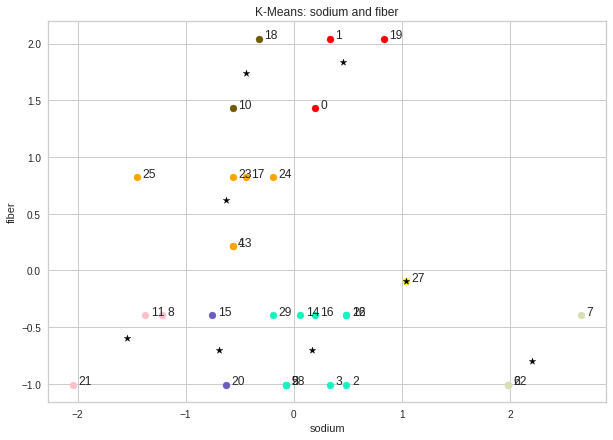

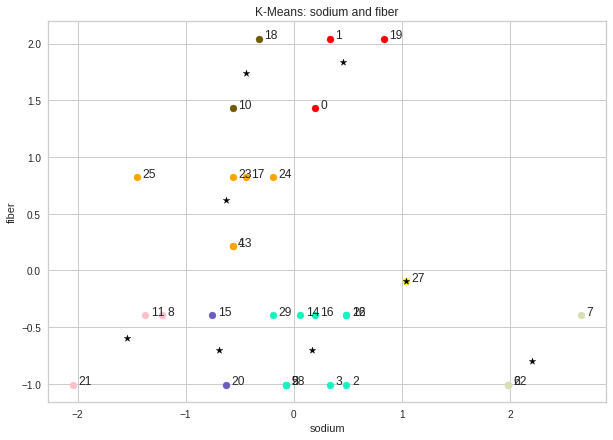

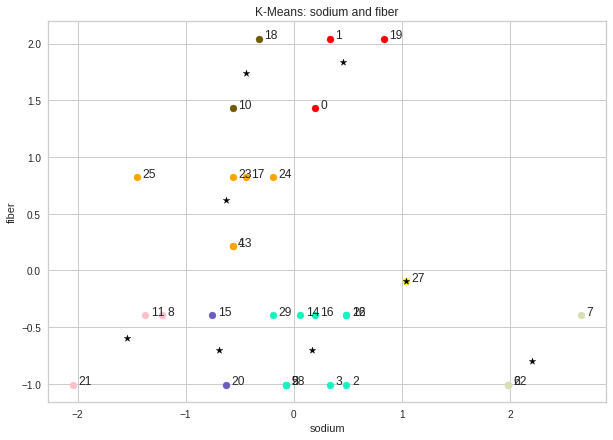

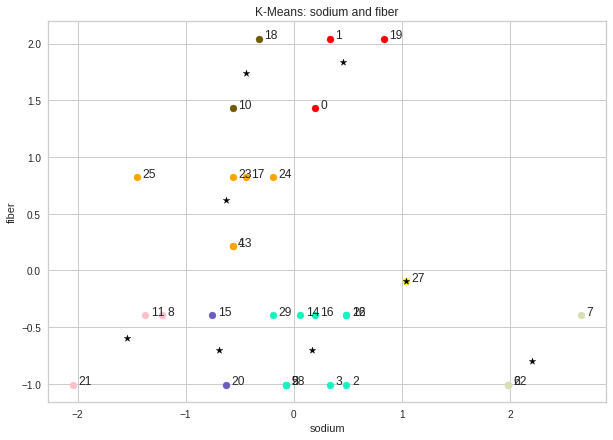

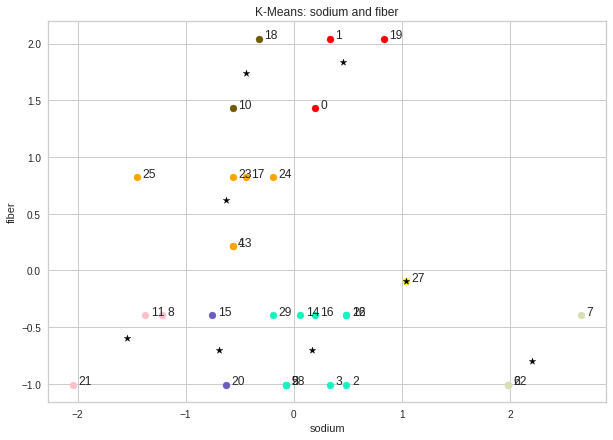

In [33]:
#przeprowadzenie algorytmu 5 razy bo 5 iteracji
clusters = find_centroids('sodium*','fiber')
print(clusters)
for element in range(5):
  for iteration in range(5):
    assignPointtoCluster(X, clusters, 'sodium*', 'fiber')
    print(clusters)
    SSE(clusters) 
    plotClusters(clusters)
    updateClusterCenters(clusters)
  print('____________________________________')
    